In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [12]:
# Load the dataset
df = pd.read_csv('D:\\F\\timeseries\\last_quantity_sold.csv')

In [13]:
# Convert dates to datetime and sort
df['DATE'] = pd.to_datetime(df['DATE'])
df.sort_values(by='DATE', inplace=True)

In [14]:

# Convert quantity values to numpy array
quantity_values = df['Quantity'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
quantity_values_scaled = scaler.fit_transform(quantity_values)


In [15]:
# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [16]:
# Define sequence length
sequence_length = 5

In [17]:
# Create sequences
X, y = create_sequences(quantity_values_scaled, sequence_length)


In [18]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [19]:
# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model and store the training history
history = model.fit(X_train, y_train, epochs=120, batch_size=16, validation_split=0.2, verbose=2)
# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Test MSE:", mse)


Epoch 1/120
57/57 - 3s - loss: 0.2694 - val_loss: 0.1326 - 3s/epoch - 50ms/step
Epoch 2/120
57/57 - 0s - loss: 0.1315 - val_loss: 0.1085 - 318ms/epoch - 6ms/step
Epoch 3/120
57/57 - 0s - loss: 0.1109 - val_loss: 0.0806 - 276ms/epoch - 5ms/step
Epoch 4/120
57/57 - 0s - loss: 0.0955 - val_loss: 0.0670 - 285ms/epoch - 5ms/step
Epoch 5/120
57/57 - 0s - loss: 0.0800 - val_loss: 0.0556 - 283ms/epoch - 5ms/step
Epoch 6/120
57/57 - 0s - loss: 0.0648 - val_loss: 0.0397 - 293ms/epoch - 5ms/step
Epoch 7/120
57/57 - 0s - loss: 0.0489 - val_loss: 0.0299 - 403ms/epoch - 7ms/step
Epoch 8/120
57/57 - 0s - loss: 0.0372 - val_loss: 0.0314 - 310ms/epoch - 5ms/step
Epoch 9/120
57/57 - 0s - loss: 0.0330 - val_loss: 0.0248 - 277ms/epoch - 5ms/step
Epoch 10/120
57/57 - 0s - loss: 0.0320 - val_loss: 0.0253 - 284ms/epoch - 5ms/step
Epoch 11/120
57/57 - 0s - loss: 0.0306 - val_loss: 0.0259 - 270ms/epoch - 5ms/step
Epoch 12/120
57/57 - 0s - loss: 0.0295 - val_loss: 0.0240 - 279ms/epoch - 5ms/step
Epoch 13/120
57

Epoch 100/120
57/57 - 0s - loss: 0.0210 - val_loss: 0.0185 - 320ms/epoch - 6ms/step
Epoch 101/120
57/57 - 1s - loss: 0.0208 - val_loss: 0.0182 - 532ms/epoch - 9ms/step
Epoch 102/120
57/57 - 0s - loss: 0.0212 - val_loss: 0.0185 - 368ms/epoch - 6ms/step
Epoch 103/120
57/57 - 0s - loss: 0.0214 - val_loss: 0.0184 - 280ms/epoch - 5ms/step
Epoch 104/120
57/57 - 0s - loss: 0.0209 - val_loss: 0.0177 - 288ms/epoch - 5ms/step
Epoch 105/120
57/57 - 0s - loss: 0.0211 - val_loss: 0.0192 - 294ms/epoch - 5ms/step
Epoch 106/120
57/57 - 0s - loss: 0.0212 - val_loss: 0.0185 - 289ms/epoch - 5ms/step
Epoch 107/120
57/57 - 0s - loss: 0.0206 - val_loss: 0.0180 - 276ms/epoch - 5ms/step
Epoch 108/120
57/57 - 0s - loss: 0.0208 - val_loss: 0.0192 - 283ms/epoch - 5ms/step
Epoch 109/120
57/57 - 0s - loss: 0.0212 - val_loss: 0.0182 - 286ms/epoch - 5ms/step
Epoch 110/120
57/57 - 0s - loss: 0.0209 - val_loss: 0.0198 - 332ms/epoch - 6ms/step
Epoch 111/120
57/57 - 0s - loss: 0.0211 - val_loss: 0.0227 - 272ms/epoch - 5

In [20]:
# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

9/9 [==============================] - 0s 4ms/step


In [21]:
# Inverse transform the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)


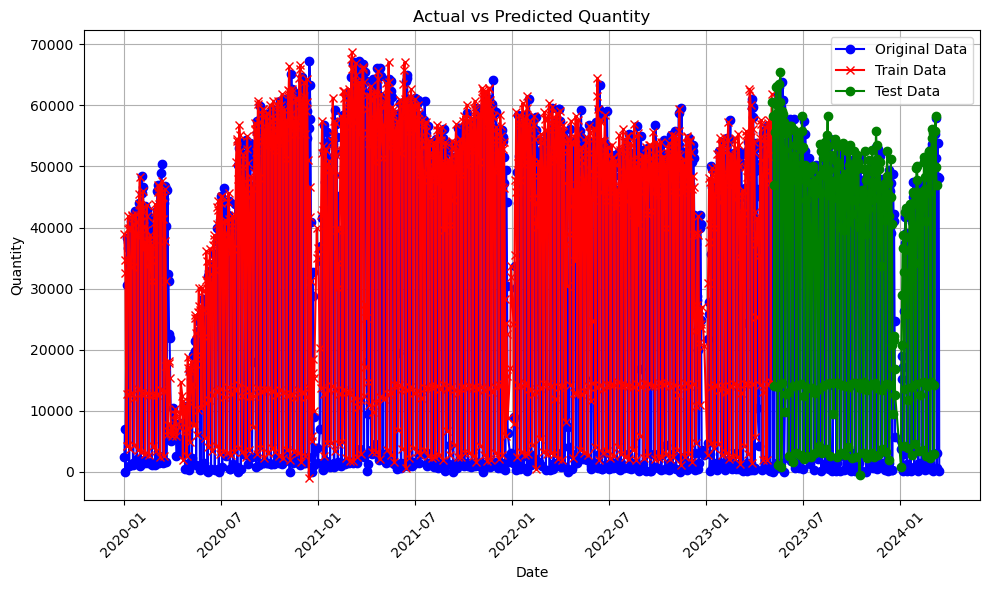

In [22]:
# Plot the original data, train data, test data, and predicted data
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['Quantity'], color='blue', label='Original Data', marker='o')
plt.plot(df['DATE'][:len(train_predictions)], train_predictions, color='red', label='Train Data', marker='x')
plt.plot(df['DATE'][len(train_predictions):len(train_predictions)+len(test_predictions)], test_predictions, color='green', label='Test Data', marker='o')

plt.title('Actual vs Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

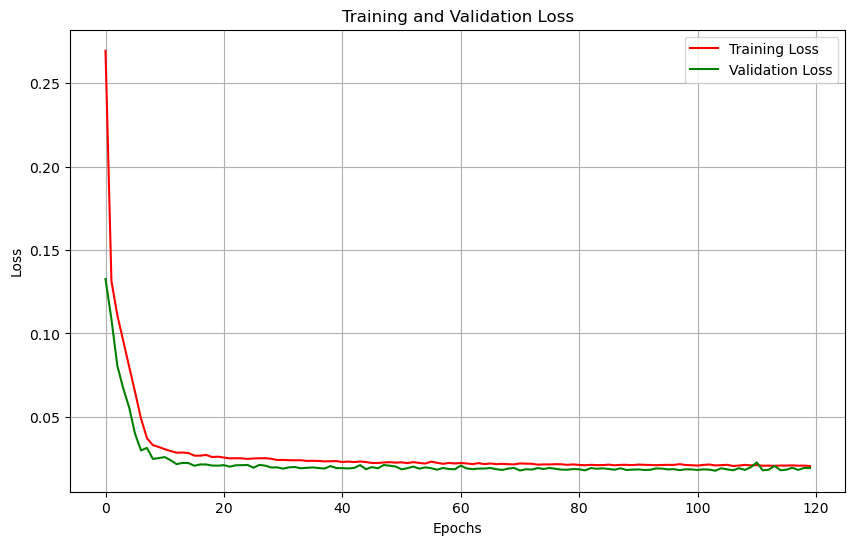

In [23]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss',color = 'red')
plt.plot(history.history['val_loss'], label='Validation Loss', color = 'green')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Forecasting for April 2024
# Extract data for March 2024 to use as input for forecasting April 2024
last_days = df[df['DATE'].dt.month == 3]['Quantity'].values[-sequence_length:]

# Normalize the last_days
last_days = scaler.transform(last_days.reshape(-1, 1))

# Reshape the last_days to match the model input shape
last_days = last_days.reshape((1, sequence_length, 1))


In [25]:
# Predict  the next value(forecasting value) for each day in April
predicted_values = []
for i in range(30):
    # Predict the next value
    predicted_value = model.predict(last_days)
    
    # Append the predicted value to the list
    predicted_values.append(predicted_value[0][0])
    
    # Shift the last_days array by one position to the right
    last_days = np.roll(last_days, -1)
    
    # Replace the last element with the predicted value
    last_days[0][-1] = predicted_value


1/1 [==============================] - 0s 29ms/step


In [26]:
# Inverse transform the forecated  values
predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))


In [27]:
# Print the forecasted values for each day in April 2024
for i, quantity in enumerate(predicted_values):
    print(f"Predicted Quantity for April {i+1}, 2024:", quantity[0])
    

Predicted Quantity for April 1, 2024: 4829.8584
Predicted Quantity for April 2, 2024: 53514.715
Predicted Quantity for April 3, 2024: 56618.59
Predicted Quantity for April 4, 2024: 57527.438
Predicted Quantity for April 5, 2024: 57577.867
Predicted Quantity for April 6, 2024: 40535.887
Predicted Quantity for April 7, 2024: -699.5377
Predicted Quantity for April 8, 2024: 15404.316
Predicted Quantity for April 9, 2024: 51075.703
Predicted Quantity for April 10, 2024: 55061.195
Predicted Quantity for April 11, 2024: 55365.78
Predicted Quantity for April 12, 2024: 54224.1
Predicted Quantity for April 13, 2024: 8726.415
Predicted Quantity for April 14, 2024: 6898.667
Predicted Quantity for April 15, 2024: 35617.87
Predicted Quantity for April 16, 2024: 33035.516
Predicted Quantity for April 17, 2024: 26370.693
Predicted Quantity for April 18, 2024: 18220.223
Predicted Quantity for April 19, 2024: 10493.243
Predicted Quantity for April 20, 2024: 7769.952
Predicted Quantity for April 21, 2024

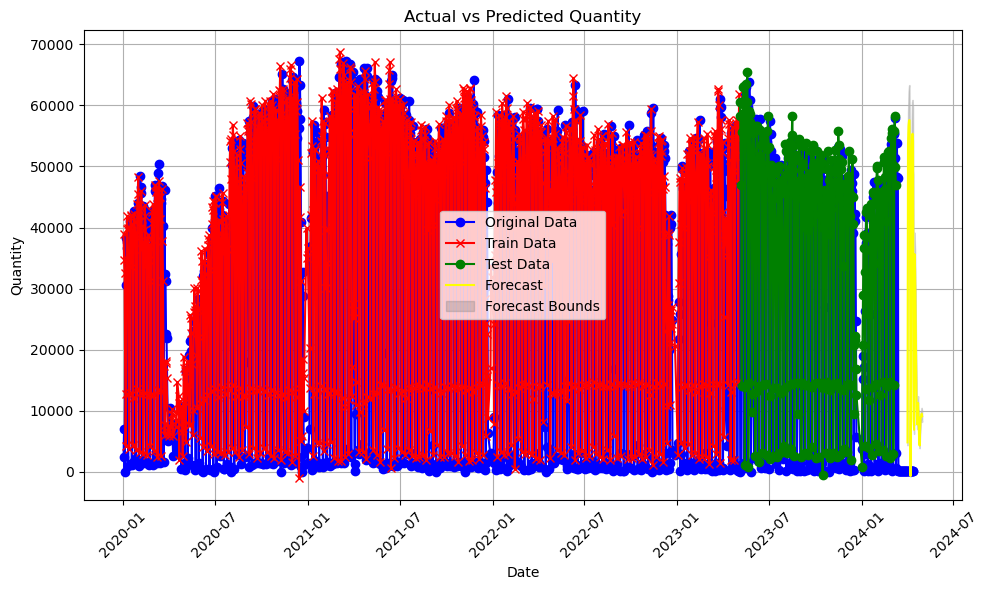

In [36]:
# Plot the original data, train data, test data, and predicted data
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['Quantity'], color='blue', label='Original Data', marker='o')
plt.plot(df['DATE'][:len(train_predictions)], train_predictions, color='red', label='Train Data', marker='x')
plt.plot(df['DATE'][len(train_predictions):len(train_predictions)+len(test_predictions)], test_predictions, color='green', label='Test Data', marker='o')
# Forecasted data
forecast_dates = pd.date_range(start='2024-04-01', end='2024-04-30')
plt.plot(forecast_dates, predicted_values, color='yellow', label='Forecast')
# Calculate upper and lower bounds
upper_bound = []
lower_bound = []
for i in range(30):
    upper_bound.append(predicted_values[i][0] * 1.1)  # Adjust multiplier as needed
    lower_bound.append(predicted_values[i][0] * 0.9)  # Adjust multiplier as needed

# Plot upper and lower bounds
plt.fill_between(forecast_dates, lower_bound, upper_bound, color='gray', alpha=0.3, label='Forecast Bounds')

plt.title('Actual vs Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


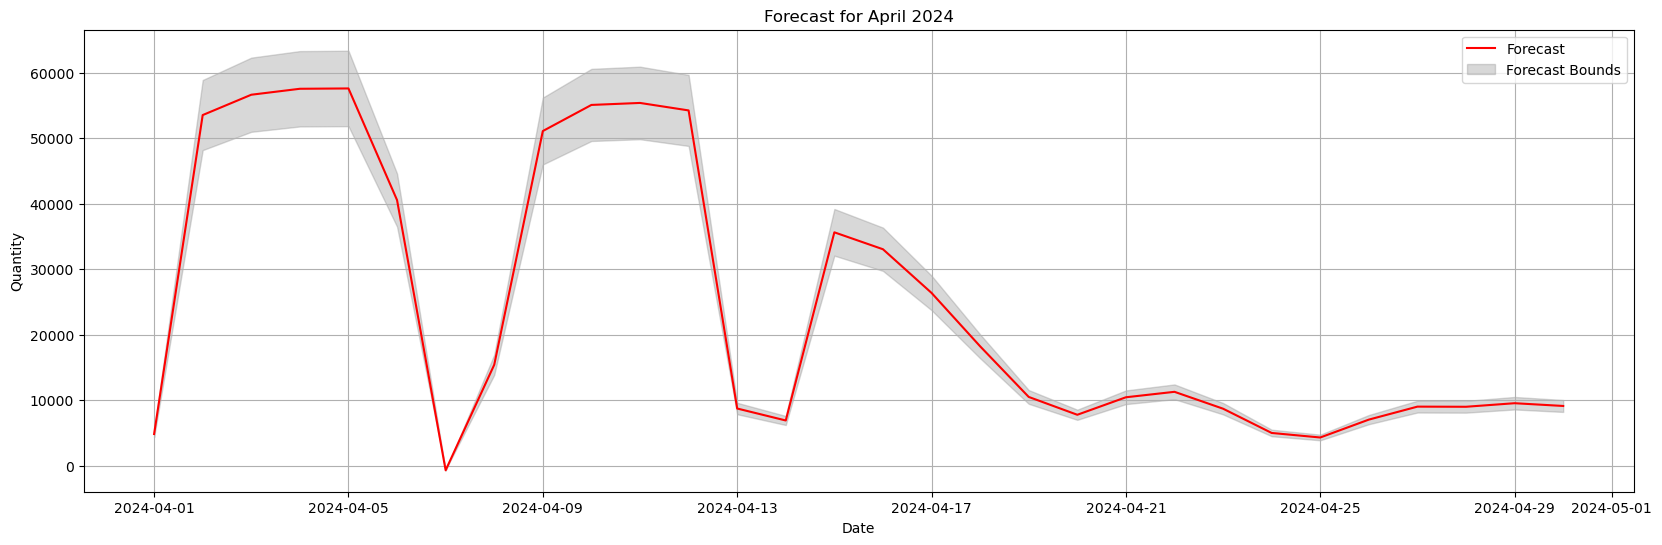

In [30]:
# Forecasted data
plt.figure(figsize=(20, 6))
forecast_dates = pd.date_range(start='2024-04-01', end='2024-04-30')
plt.plot(forecast_dates, predicted_values, color='red', label='Forecast')
# Plot upper and lower bounds
plt.fill_between(forecast_dates, lower_bound, upper_bound, color='gray', alpha=0.3, label='Forecast Bounds')
# Set labels and title
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Forecast for April 2024')
plt.legend()
plt.grid(True)
# Show plot
plt.show()